In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#energy_data.csv is the original csv file
#ori_data.txt is the normalized and batched version of data in the csv file
#gen_energy.npy is the synthetic data generated

In [2]:
#generated data for energy data

gen_energy = np.load("data/gen_energy.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'data/gen_energy.npy'

In [5]:
gen_energy.shape
#19711: num samples
#24: seq length
#28: dimensions (this is the number of columns in csv)

(19711, 24, 28)

In [6]:
#one slice of time-series data generated
gen_energy[0]

array([[0.18730003, 0.2524063 , 0.37737542, 0.39201572, 0.23938536,
        0.5404433 , 0.19925967, 0.63515168, 0.32046792, 0.61196172,
        0.21260211, 0.48408022, 0.26752835, 0.94304383, 0.17160538,
        0.48520538, 0.26374387, 0.52522105, 0.1825777 , 0.56019181,
        0.25470447, 0.68382394, 0.79936337, 0.44419792, 0.30498245,
        0.31048843, 0.33286247, 0.3329072 ],
       [0.19639382, 0.02019817, 0.35628837, 0.3982541 , 0.25157386,
        0.53994834, 0.24453065, 0.63592004, 0.32753992, 0.61278861,
        0.22708025, 0.50238389, 0.21984464, 0.92154759, 0.17218682,
        0.5356217 , 0.16975146, 0.52477413, 0.15073514, 0.55531627,
        0.21923608, 0.75262171, 0.73324287, 0.55616718, 0.29676911,
        0.24289098, 0.28020942, 0.28001177],
       [0.16814461, 0.01441008, 0.33971744, 0.33364251, 0.22653419,
        0.4883815 , 0.22591194, 0.52425033, 0.25167453, 0.53526342,
        0.20699045, 0.32060343, 0.20800048, 0.89904469, 0.14772308,
        0.45045239, 0.1637

In [7]:
#code from github

def MinMaxScaler(data):
  """Min Max normalizer.
  
  Args:
    - data: original data
  
  Returns:
    - norm_data: normalized data
  """
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  norm_data = numerator / (denominator + 1e-7)
  return norm_data

def real_data_loading (data_name, seq_len):
  """Load and preprocess real-world datasets.
  
  Args:
    - data_name: stock or energy
    - seq_len: sequence length
    
  Returns:
    - data: preprocessed data.
  """  
  assert data_name in ['stock','energy', 'prism']

  if data_name == 'stock':
    ori_data = np.loadtxt('data/stock_data.csv', delimiter = ",",skiprows = 1)
  elif data_name == 'energy':
    ori_data = np.loadtxt('data/energy_data.csv', delimiter = ",",skiprows = 1)
  elif data_name == 'prism':
    ori_data = np.loadtxt('data/prism_data_25_irreg.csv', delimiter = ",",skiprows = 1)
        
  # Flip the data to make chronological data
  if data_name != 'prism':
    ori_data = ori_data[::-1]
  # Normalize the data
  ori_data = MinMaxScaler(ori_data)
    
  # Preprocess the dataset
  temp_data = []    
  # Cut data by sequence length
  for i in range(0, len(ori_data) - seq_len):
    _x = ori_data[i:i + seq_len]
    temp_data.append(_x)
        
  # Mix the datasets (to make it similar to i.i.d)
  idx = np.random.permutation(len(temp_data))    
  data = []
  for i in range(len(temp_data)):
    data.append(temp_data[idx[i]])
    
  return data

In [8]:
#create slices of time-series data from energy csv file

energy_data_slices = real_data_loading('energy', 24)

print(len(energy_data_slices))
print(energy_data_slices[0].shape)
#input and output has same shape (input is a list of time-series slices)

19711
(24, 28)


In [9]:
#1st column of 1st sample of input
energy_data_slices[0][:, 0]

array([0.01869159, 0.00934579, 0.01869159, 0.01869159, 0.03738318,
       0.03738318, 0.03738318, 0.04672897, 0.04672897, 0.04672897,
       0.03738318, 0.03738318, 0.02803738, 0.04672897, 0.03738318,
       0.05607477, 0.04672897, 0.04672897, 0.03738318, 0.04672897,
       0.03738318, 0.03738318, 0.03738318, 0.04672897])

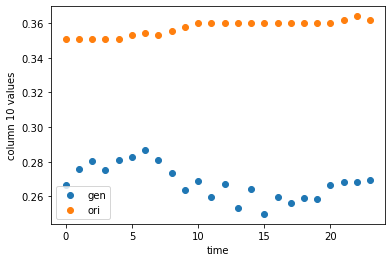

In [19]:
x = [i for i in range(24)]

sample_in = 5 # change to view different samples
sample_out = 2 #change to view different samples
column = 10 # change to view different columns(diff features like temp, windspeed etc)


plt.scatter(x, gen_energy[sample_out][:, column], label='gen')
plt.scatter(x, energy_data_slices[sample_in][:, column], label='ori')
plt.xlabel('time') #just assuming regularly increasing time
plt.ylabel('column {} values'.format(column))
plt.legend()

#NOTE: the generated data has been "un-normalized", while the ori data is still normalized